In [2]:
import os
import json
import gzip
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import scipy
import re
import warnings
#import pandas_profiling 
import seaborn as sns
import requests
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import word_tokenize
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import *
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise.model_selection import RandomizedSearchCV
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from io import StringIO
from IPython.display import Markdown, display
from IPython.display import HTML
from IPython.display import display_html
from nltk.stem import WordNetLemmatizer
pd.options.display.max_colwidth = 100

In [3]:
#!pip install pandas-profiling

In [48]:
df = pd.read_csv('10_core_Video_Games.csv')

In [49]:
df = df.drop(['imageURL', 'imageURLHighRes', 'unixReviewTime'], axis = 1)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126703 entries, 0 to 126702
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       126703 non-null  float64
 1   verified      126703 non-null  bool   
 2   reviewTime    126703 non-null  object 
 3   reviewerID    126703 non-null  object 
 4   asin          126703 non-null  object 
 5   reviewerName  126661 non-null  object 
 6   reviewText    126669 non-null  object 
 7   summary       126681 non-null  object 
 8   vote          33268 non-null   object 
 9   style         85985 non-null   object 
 10  image         795 non-null     object 
 11  category      126703 non-null  object 
 12  tech1         1788 non-null    object 
 13  description   126703 non-null  object 
 14  title         126703 non-null  object 
 15  also_buy      126703 non-null  object 
 16  tech2         433 non-null     object 
 17  brand         126661 non-null  object 
 18  feat

In [51]:
df.loc[df['details'] == '{}']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,details
17,2.0,True,"02 21, 2009",A15ZA8PI69FERL,9629971372,William Tucker,"I was hesitant to buy this memory card because of the inconsistent reviews of ""my carrying case""...",Does what it says so far.,19,NaN,...,NaN,Dotop,['brand new'],"['>#66,157 in Electronics (See Top 100 in Electronics)', '>#214 in Video Games &gt; More Systems...",[],Computers,NaN,"June 16, 2008",$9.90,{}
18,5.0,True,"05 16, 2016",A2WVKPHGUWL6NS,9629971372,Rexy J.,great,Five Stars,NaN,NaN,...,NaN,Dotop,['brand new'],"['>#66,157 in Electronics (See Top 100 in Electronics)', '>#214 in Video Games &gt; More Systems...",[],Computers,NaN,"June 16, 2008",$9.90,{}
19,5.0,True,"06 4, 2015",A2I5S36EGKUZHV,9629971372,Rebecca O.,"Great product, as advertised",Five Stars,NaN,NaN,...,NaN,Dotop,['brand new'],"['>#66,157 in Electronics (See Top 100 in Electronics)', '>#214 in Video Games &gt; More Systems...",[],Computers,NaN,"June 16, 2008",$9.90,{}
20,5.0,False,"04 12, 2015",A2V7GYJNXLNJQS,9629971372,Ella Veal,I like it,Five Stars,NaN,NaN,...,NaN,Dotop,['brand new'],"['>#66,157 in Electronics (See Top 100 in Electronics)', '>#214 in Video Games &gt; More Systems...",[],Computers,NaN,"June 16, 2008",$9.90,{}
21,5.0,True,"12 24, 2014",AKUT3YW6BGP5Q,9629971372,james m mccord,So much data space! Works just fine.,Works just fine.,NaN,NaN,...,NaN,Dotop,['brand new'],"['>#66,157 in Electronics (See Top 100 in Electronics)', '>#214 in Video Games &gt; More Systems...",[],Computers,NaN,"June 16, 2008",$9.90,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126698,5.0,True,"07 31, 2018",A54HS3OVH0H2B,B01H2DKI3G,Andrew Patton,"This amiibo is a great use for games on Nintendo Switch, the Nintendo Wii U, and the New Nintend...",Best amiibo Ever!,NaN,{'Edition:': ' Rosalina'},...,NaN,by\n \n Nintendo,['Introducing amiibo: character figures designed to connect and interact with compatible games.'...,"['>#10,623 in Video Games (See Top 100 in Video Games)', '>#158 in Video Games > Wii U > Games',...","['B00PIEHUDS', 'B00S7O6QWM', 'B00SWVAFTA', 'B01LC99F26', 'B00S7O6RG2', 'B00N4ABT1W', 'B00UL0BMA6...",Video Games,NaN,NaN,NaN,{}
126699,5.0,True,"08 10, 2018",A30T51SMB0UQR1,B01H2DKHPA,Steven,goes great with my collection of amiibo figures.,Five Stars,NaN,{'Edition:': ' Waluigi'},...,NaN,by\n \n Nintendo,['Introducing amiibo: character figures designed to connect and interact with compatible games.'...,"['>#4,425 in Video Games (See Top 100 in Video Games)', '>#75 in Video Games > Wii U > Games', '...","['B01LC99KV2', 'B00S7O6R9E', 'B071K9MTPY', 'B071K9MZ6P', 'B00V86C4LS', 'B00S7O6R62', 'B00S7O6RG2...",Video Games,NaN,NaN,NaN,{}
126700,5.0,True,"08 17, 2018",A28T3GWEMQLXWI,B01H3NU4OS,JDUB,Very fun and entertaining! Thanks!!,Entertainment,NaN,NaN,...,NaN,by\n \n Nintendo,"['Break free of turn order, with all players plotting strategy, rolling the dice, and moving. al...","['>#4,040 in Video Games (See Top 100 in Video Games)', '>#449 in Video Games > Nintendo 3DS']","['B075M5MCDF', 'B0792HGXB8', 'B00CH9253W', 'B01AC3ZA0Y', 'B000U34SZA', 'B01LDUYTX4', 'B00DC7G3Q8...",Video Games,NaN,NaN,\n\t\t \n\r\n\r\n\r\n\r\n\r\n \r\n \r\n ...,{}
126701,5.0,True,"03 12, 2018",A2Q8SD3EJVRNPQ,B01H3NU4OS,Thomas Dunn,Perfect,Five Stars,NaN,NaN,...,NaN,by\n \n Nintendo,"['Break free of turn order, with all players plotting strategy, rolling the dice, and moving. al...","['>#4,040 in Video Games (See Top 100 in Video Games)', '>#449 in Video Games > Nintendo 3DS']","['B075M5MCDF', 'B0792HGXB8', 'B00CH9253W', 'B01AC3ZA0Y', 'B000U34SZA', 'B01LDUYTX4', 'B00DC7G3Q8...",Video Games,NaN,NaN,\n\t\t \n\r\n\r\n\r\n\r\n\r\n \r\n \r\n ...,{}


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126703 entries, 0 to 126702
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       126703 non-null  float64
 1   verified      126703 non-null  bool   
 2   reviewTime    126703 non-null  object 
 3   reviewerID    126703 non-null  object 
 4   asin          126703 non-null  object 
 5   reviewerName  126661 non-null  object 
 6   reviewText    126669 non-null  object 
 7   summary       126681 non-null  object 
 8   vote          33268 non-null   object 
 9   style         85985 non-null   object 
 10  image         795 non-null     object 
 11  category      126703 non-null  object 
 12  tech1         1788 non-null    object 
 13  description   126703 non-null  object 
 14  title         126703 non-null  object 
 15  also_buy      126703 non-null  object 
 16  tech2         433 non-null     object 
 17  brand         126661 non-null  object 
 18  feat

In [53]:
df.loc[df.price.apply(lambda x: bool(re.match('^[$][0-9]+.[0-9][0-9]$', str(x))))]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,details
0,5.0,True,"01 23, 2017",A1DWHVHU20K6RH,0804161380,D Comrey,Awesome,Five Stars,NaN,{'Format:': ' Hardcover'},...,NaN,DIAMOND SELECT TOYS,"['Set includes 6x Legend Of Zelda strategy guides', 'Officially licensed release, includes Eija ...","['>#16,405 in Video Games (See Top 100 in Video Games)']","['1911015486', '1506703356', '1616550414', '1506707408', '1101898437', '1911015214', '0744017025...",Video Games,NaN,NaN,$299.00,NaN
1,5.0,True,"04 18, 2016",A1U08MKZHEMMRC,0804161380,Wadev3,Very nicely put together. Crisp and clean and very good detail.,Five Stars,NaN,{'Format:': ' Hardcover'},...,NaN,DIAMOND SELECT TOYS,"['Set includes 6x Legend Of Zelda strategy guides', 'Officially licensed release, includes Eija ...","['>#16,405 in Video Games (See Top 100 in Video Games)']","['1911015486', '1506703356', '1616550414', '1506707408', '1101898437', '1911015214', '0744017025...",Video Games,NaN,NaN,$299.00,NaN
2,2.0,True,"12 16, 2015",A391E3PBD96BPL,0804161380,Toy,"Bought for future investing/collecting. Paper included isn't personally signed by the guy,its ju...",Wish I passed this one,NaN,{'Format:': ' Hardcover'},...,NaN,DIAMOND SELECT TOYS,"['Set includes 6x Legend Of Zelda strategy guides', 'Officially licensed release, includes Eija ...","['>#16,405 in Video Games (See Top 100 in Video Games)']","['1911015486', '1506703356', '1616550414', '1506707408', '1101898437', '1911015214', '0744017025...",Video Games,NaN,NaN,$299.00,NaN
3,5.0,True,"05 5, 2015",ADF134Y82NAG0,0804161380,Sin,"great product ,",Five Stars,NaN,{'Format:': ' Hardcover'},...,NaN,DIAMOND SELECT TOYS,"['Set includes 6x Legend Of Zelda strategy guides', 'Officially licensed release, includes Eija ...","['>#16,405 in Video Games (See Top 100 in Video Games)']","['1911015486', '1506703356', '1616550414', '1506707408', '1101898437', '1911015214', '0744017025...",Video Games,NaN,NaN,$299.00,NaN
4,5.0,True,"01 2, 2015",A28NUXQ2ONMT89,0804161380,trojanboy_cdx,best idea to put all these books in a collectors case.,Five Stars,NaN,{'Format:': ' Hardcover'},...,NaN,DIAMOND SELECT TOYS,"['Set includes 6x Legend Of Zelda strategy guides', 'Officially licensed release, includes Eija ...","['>#16,405 in Video Games (See Top 100 in Video Games)']","['1911015486', '1506703356', '1616550414', '1506707408', '1101898437', '1911015214', '0744017025...",Video Games,NaN,NaN,$299.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126605,5.0,True,"03 1, 2018",A3GGWX9NB4EIQ2,B01B6R8YMG,ghost,love,Five Stars,NaN,NaN,...,NaN,by\n \n Microsoft,"['This bundle includes: 500GB hard drive Cirrus White Xbox One Console, full-game digital downlo...","['>#13,292 in Video Games (See Top 100 in Video Games)', '>#87 in Video Games > Xbox One > Conso...","['B0118GJKIW', 'B076MGLYZS', 'B017EUIF0U', 'B018BKB7SO', 'B00NFXON1Q', 'B01NCKWM4M', 'B0136JP9OS...",Video Games,NaN,NaN,$39.28,{}
126612,3.0,True,"05 20, 2017",A1XECVJAW1EWYM,B01BGSF9DC,crybaby2,Not sure I like the fight system in this game.,Three Stars,NaN,{'Edition:': ' PlayStation 4 - Launch Day Edition'},...,NaN,NIS America,"[""An Epic Story: Uncover the mystery behind the fall of the Uldein Empire by traversing through ...","['>#20,981 in Video Games (See top 100)', '>#1,543 in Video Games > PlayStation 4 > Games']","['B0186D1UQ0', 'B00ZM6I932', 'B01ESA0W3C', 'B017GY07L4', 'B01MQ22AJE', 'B0185H34Z2', 'B06X1D3YPL...",Video Games,NaN,"February 4, 2016",$19.97,{}
126613,4.0,True,"04 24, 2017",A31H1ECKRMHRRQ,B01BGSF9DC,Brad80,Great strat game. Can be a bit grindy at times.,Good strat game,NaN,{'Edition:': ' PlayStation 4 - Launch Day Edition'},...,NaN,NIS America,"[""An Epic Story: Uncover the mystery behind the fall of the Uldein Empire by traversing through ...","['>#20,981 in Video Games (See top 100)', '>#1,543 in Video Games > PlayStati

In [54]:
df.price.mask(~df.price.apply(lambda x: bool(re.match('^[$][0-9]+.[0-9][0-9]$', str(x)))), np.nan)

0         $299.00
1         $299.00
2         $299.00
3         $299.00
4         $299.00
           ...   
126698        NaN
126699        NaN
126700        NaN
126701        NaN
126702        NaN
Name: price, Length: 126703, dtype: object

In [55]:
df.price = df['price'].replace(regex=r'^[\n]*$',value= np.NaN)

In [56]:
df.loc[~df.price.apply(lambda x: bool(re.match('^[$][0-9]+.[0-9][0-9]$', str(x)))), ['price']] = np.nan

In [57]:
df.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,...,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,details
126698,5.0,True,"07 31, 2018",A54HS3OVH0H2B,B01H2DKI3G,Andrew Patton,"This amiibo is a great use for games on Nintendo Switch, the Nintendo Wii U, and the New Nintend...",Best amiibo Ever!,NaN,{'Edition:': ' Rosalina'},...,NaN,by\n \n Nintendo,['Introducing amiibo: character figures designed to connect and interact with compatible games.'...,"['>#10,623 in Video Games (See Top 100 in Video Games)', '>#158 in Video Games > Wii U > Games',...","['B00PIEHUDS', 'B00S7O6QWM', 'B00SWVAFTA', 'B01LC99F26', 'B00S7O6RG2', 'B00N4ABT1W', 'B00UL0BMA6...",Video Games,NaN,NaN,NaN,{}
126699,5.0,True,"08 10, 2018",A30T51SMB0UQR1,B01H2DKHPA,Steven,goes great with my collection of amiibo figures.,Five Stars,NaN,{'Edition:': ' Waluigi'},...,NaN,by\n \n Nintendo,['Introducing amiibo: character figures designed to connect and interact with compatible games.'...,"['>#4,425 in Video Games (See Top 100 in Video Games)', '>#75 in Video Games > Wii U > Games', '...","['B01LC99KV2', 'B00S7O6R9E', 'B071K9MTPY', 'B071K9MZ6P', 'B00V86C4LS', 'B00S7O6R62', 'B00S7O6RG2...",Video Games,NaN,NaN,NaN,{}
126700,5.0,True,"08 17, 2018",A28T3GWEMQLXWI,B01H3NU4OS,JDUB,Very fun and entertaining! Thanks!!,Entertainment,NaN,NaN,...,NaN,by\n \n Nintendo,"['Break free of turn order, with all players plotting strategy, rolling the dice, and moving. al...","['>#4,040 in Video Games (See Top 100 in Video Games)', '>#449 in Video Games > Nintendo 3DS']","['B075M5MCDF', 'B0792HGXB8', 'B00CH9253W', 'B01AC3ZA0Y', 'B000U34SZA', 'B01LDUYTX4', 'B00DC7G3Q8...",Video Games,NaN,NaN,NaN,{}
126701,5.0,True,"03 12, 2018",A2Q8SD3EJVRNPQ,B01H3NU4OS,Thomas Dunn,Perfect,Five Stars,NaN,NaN,...,NaN,by\n \n Nintendo,"['Break free of turn order, with all players plotting strategy, rolling the dice, and moving. al...","['>#4,040 in Video Games (See Top 100 in Video Games)', '>#449 in Video Games > Nintendo 3DS']","['B075M5MCDF', 'B0792HGXB8', 'B00CH9253W', 'B01AC3ZA0Y', 'B000U34SZA', 'B01LDUYTX4', 'B00DC7G3Q8...",Video Games,NaN,NaN,NaN,{}
126702,4.0,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,"I think I originally began playing Bioshock several years ago, but wasn't leveled up enough or d...","It's Okay, Nothing Profound",NaN,"{'Edition:': ' Collection', 'Platform:': ' Xbox One'}",...,NaN,by\n \n 2K,"['Remastered in 1080p.', 'BioShock main game and all single player DLC.', 'BioShock 2 main game ...","['>#2,260 in Video Games (See Top 100 in Video Games)', '>#225 in Video Games > Xbox One > Games']","['B01HXPVTPO', 'B00NY7H0T0', 'B01IPJC9F6', 'B00SHXKC82', 'B00KF7BE7G', 'B00ZOET7BU', 'B0719763JF...",Video Games,NaN,NaN,NaN,{}


In [58]:
df = df.replace('[]', np.nan)
df = df.replace('{}', np.nan)

<AxesSubplot:title={'center':'Proportion of Missing Values'}, xlabel='features', ylabel='proportion'>

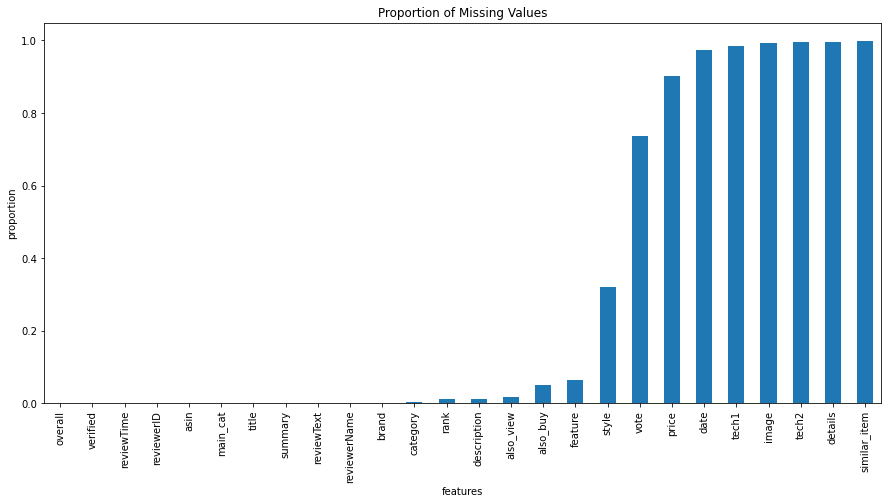

In [59]:
df.isna().mean().sort_values().plot(kind = 'bar', figsize=(15,7), xlabel = 'features', ylabel = 'proportion', title = "Proportion of Missing Values")

In [60]:
df.isna().mean().sort_values()

overall         0.000000
verified        0.000000
reviewTime      0.000000
reviewerID      0.000000
asin            0.000000
main_cat        0.000000
title           0.000000
summary         0.000174
reviewText      0.000268
reviewerName    0.000331
brand           0.000331
category        0.002352
rank            0.010489
description     0.011389
also_view       0.016156
also_buy        0.049415
feature         0.062950
style           0.321366
vote            0.737433
price           0.902867
date            0.973600
tech1           0.985888
image           0.993725
tech2           0.996583
details         0.996859
similar_item    0.999108
dtype: float64

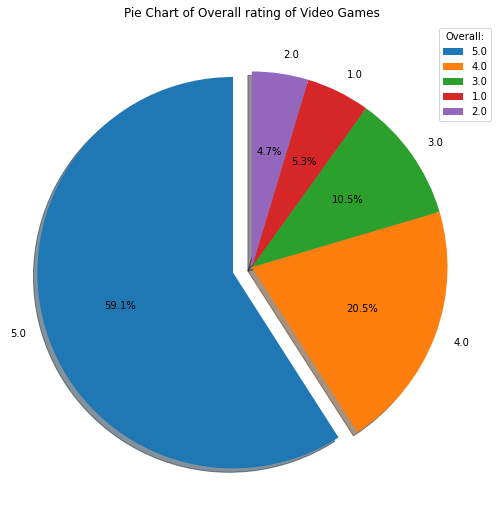

In [16]:
labels = [5.0, 4.0, 3.0, 1.0, 2.0]
values = list(df.overall.value_counts())

fig = plt.figure(figsize =(9, 9))
explode = (0.1, 0, 0, 0, 0) 
plt.pie(values, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Pie Chart of Overall rating of Video Games")
plt.legend(title = "Overall:")

plt.show()

In [17]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

<AxesSubplot:title={'center':'Number of reviews in each year'}, xlabel='Years', ylabel='Number of reviews'>

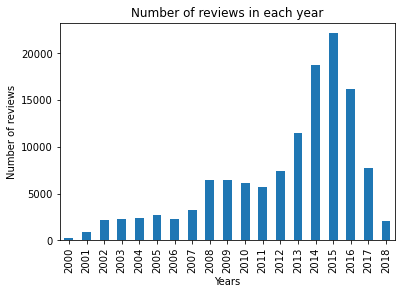

In [18]:
df.reviewTime.dt.year.value_counts().sort_index().plot(kind='bar', xlabel = 'Years', ylabel = 'Number of reviews', title = 'Number of reviews in each year')

<AxesSubplot:title={'center':'Number of reviews in each month'}, xlabel='Months', ylabel='Number of Reviews'>

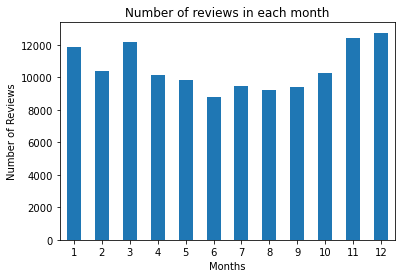

In [19]:
df.reviewTime.dt.month.value_counts().sort_index().plot(kind='bar', rot = 0, xlabel = 'Months', ylabel = 'Number of Reviews', title = 'Number of reviews in each month')

In [20]:
for i in df.loc[df.reviewerID == 'A1XS11O88LF748']['asin']:
    print(len(df.loc[df.asin == i]))

61
38
52
25
28
20
21
28
12
20


In [21]:
df = df.drop(['style','vote', 'price', 'date', 'tech1', 'image', 'tech2'], axis = 1)

In [22]:
df = df.drop(['similar_item', 'details'], axis = 1)

In [23]:
ratings = df[['reviewerID', 'asin','overall']]

In [24]:
ratings[ratings['reviewerID'] == 'AJKWF4W7QD4NS']

,reviewerID,asin,overall
365,AJKWF4W7QD4NS,B00000DMAV,4.0
517,AJKWF4W7QD4NS,B00000I1C1,5.0
663,AJKWF4W7QD4NS,B00000I1BJ,5.0
726,AJKWF4W7QD4NS,B00000IKCC,4.0
1102,AJKWF4W7QD4NS,B00000JRSB,5.0
...,...,...,...
75374,AJKWF4W7QD4NS,B0053B7ICO,4.0
75573,AJKWF4W7QD4NS,B0053OMTVQ,4.0
75681,AJKWF4W7QD4NS,B0054IN5AA,4.0
76065,AJKWF4W7QD4NS,B005C2QSDY,4.0


In [25]:
ratings.columns = ['user','item','rating']

In [26]:
ratings

,user,item,rating
0,A1DWHVHU20K6RH,0804161380,5.0
1,A1U08MKZHEMMRC,0804161380,5.0
2,A391E3PBD96BPL,0804161380,2.0
3,ADF134Y82NAG0,0804161380,5.0
4,A28NUXQ2ONMT89,0804161380,5.0
...,...,...,...
126698,A54HS3OVH0H2B,B01H2DKI3G,5.0
126699,A30T51SMB0UQR1,B01H2DKHPA,5.0
126700,A28T3GWEMQLXWI,B01H3NU4OS,5.0
126701,A2Q8SD3EJVRNPQ,B01H3NU4OS,5.0


In [27]:
reader = Reader()
surprise_data = Dataset.load_from_df(ratings, reader)

In [28]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(surprise_data, test_size=.3, random_state=10)

In [29]:
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [30]:
class collab_filtering_based_recommender_model():
    def __init__(self, model, trainset, testset, data):
        self.model = model
        self.trainset = trainset
        self.testset = testset
        self.data = data
        self.pred_test = None
        self.recommendations = None
        self.top_n = None
        self.recommenddf = None

    def fit_and_predict(self):        
        printmd('**Fitting the train data...**', color='brown')
        self.model.fit(self.trainset)       

        printmd('**Predicting the test data...**', color='brown')
        self.pred_test = self.model.test(self.testset)        
        rmse = round(accuracy.rmse(self.pred_test), 3)
        printmd('**RMSE for the predicted result is ' + str(rmse) + '**', color='brown')   
        
        self.top_n = get_top_n(self.pred_test)
        self.recommenddf = pd.DataFrame(columns=['userId', 'productId', 'Rating'])
        for item in self.top_n:
            subdf = pd.DataFrame(self.top_n[item], columns=['productId', 'Rating'])
            subdf['userId'] = item
            cols = subdf.columns.tolist()
            cols = cols[-1:] + cols[:-1]
            subdf = subdf[cols]        
            self.recommenddf = pd.concat([self.recommenddf, subdf], axis = 0)        
        return rmse
        
    def cross_validate(self):
        printmd('**Cross Validating the data...**', color='brown')
        cv_result = cross_validate(self.model, self.data, n_jobs=-1)
        cv_result = round(cv_result['test_rmse'].mean(),3)
        printmd('**Mean CV RMSE is ' + str(cv_result)  + '**', color='brown')
        return cv_result

    def recommend(self, user_id, n=5):
        printmd('**Recommending top ' + str(n)+ ' products for userid : ' + user_id + ' ...**', color='brown')
        df = self.recommenddf[self.recommenddf['userId'] == user_id].head(n)
        display(df)
        return df

In [31]:
def find_best_model(model, parameters,data):
    clf = RandomizedSearchCV(model, parameters, n_jobs=-1, measures=['rmse'])
    clf.fit(data)             
    print(clf.best_score)
    print(clf.best_params)
    print(clf.best_estimator)
    return clf

In [32]:
sim_options = {
    "name": ["msd", "cosine", "pearson", "pearson_baseline"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}
params = { 'k': range(30,50,1), 'sim_options': sim_options}
clf = find_best_model(KNNWithMeans, params, surprise_data)

{'rmse': 0.9780661345731556}
{'rmse': {'k': 37, 'sim_options': {'name': 'pearson_baseline', 'min_support': 5, 'user_based': True}}}
{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x0000020D8F6618E0>}


In [33]:
knnwithmeans = clf.best_estimator['rmse']
col_fil_knnwithmeans = collab_filtering_based_recommender_model(knnwithmeans, trainset, testset, surprise_data)

In [34]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
def display_side_by_side(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

In [35]:
knnwithmeans_rmse = col_fil_knnwithmeans.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.9743


<span style='color:brown'>**RMSE for the predicted result is 0.974**</span>

In [36]:
result_knn_user1 = col_fil_knnwithmeans.recommend(user_id='A2MNJFQXCLMKT8', n=5)

<span style='color:brown'>**Recommending top 5 products for userid : A2MNJFQXCLMKT8 ...**</span>

,userId,productId,Rating
0,A2MNJFQXCLMKT8,B01FSO3XI8,4.16
1,A2MNJFQXCLMKT8,B00TEDK8FQ,4.16
2,A2MNJFQXCLMKT8,B01CR058OS,4.16
3,A2MNJFQXCLMKT8,B00DS0MQUQ,4.16
4,A2MNJFQXCLMKT8,B00ZSDTIGG,4.16


In [37]:
result = pd.merge(result_knn_user1, df, how = 'inner', left_on='productId', right_on='asin')[['userId', 'title', 'Rating']].drop_duplicates()

In [38]:
result

,userId,title,Rating
0,A2MNJFQXCLMKT8,Batman: Return to Arkham - PlayStation 4 Standard Edition,4.16
20,A2MNJFQXCLMKT8,Ortz PS4 Vertical Stand with Cooling Fan [Dual Charger Ports] Premium Quality Controller Chargin...,4.16
60,A2MNJFQXCLMKT8,Resident Evil 5 - Standard Edition - PlayStation 4,4.16
88,A2MNJFQXCLMKT8,Battlefield 4 - PlayStation 4,4.16
182,A2MNJFQXCLMKT8,DualShock 4 Wireless Controller for PlayStation 4 - 20th Anniversary Edition,4.16


In [39]:
params= {
    "n_epochs": [5, 10, 15, 20],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
clf = find_best_model(SVD, params, surprise_data)

{'rmse': 0.964380863316779}
{'rmse': {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}}
{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000020D952801F0>}


In [40]:
svd = clf.best_estimator['rmse']
col_fil_svd = collab_filtering_based_recommender_model(svd, trainset, testset, surprise_data)

In [41]:
svd_rmse = col_fil_svd.fit_and_predict()

<span style='color:brown'>**Fitting the train data...**</span>

<span style='color:brown'>**Predicting the test data...**</span>

RMSE: 0.9636


<span style='color:brown'>**RMSE for the predicted result is 0.964**</span>

In [42]:
result_svd_user1 = col_fil_svd.recommend(user_id='A2MNJFQXCLMKT8', n=5)

<span style='color:brown'>**Recommending top 5 products for userid : A2MNJFQXCLMKT8 ...**</span>

,userId,productId,Rating
0,A2MNJFQXCLMKT8,B00GZ1GUSY,4.441154
1,A2MNJFQXCLMKT8,B00BMFIXOW,4.439413
2,A2MNJFQXCLMKT8,B00ZSDTIGG,4.425713
3,A2MNJFQXCLMKT8,B01CR058OS,4.381832
4,A2MNJFQXCLMKT8,B01FSO3XI8,4.289743


In [43]:
result = pd.merge(result_svd_user1, df, how = 'inner', left_on='productId', right_on='asin')[['userId', 'title', 'Rating']].drop_duplicates()

In [44]:
result

,userId,title,Rating
0,A2MNJFQXCLMKT8,Tomb Raider: Definitive Edition - PlayStation 4,4.441154
156,A2MNJFQXCLMKT8,Assassin's Creed IV Black Flag - PlayStation 4,4.439413
319,A2MNJFQXCLMKT8,DualShock 4 Wireless Controller for PlayStation 4 - 20th Anniversary Edition,4.425713
348,A2MNJFQXCLMKT8,Resident Evil 5 - Standard Edition - PlayStation 4,4.381832
376,A2MNJFQXCLMKT8,Batman: Return to Arkham - PlayStation 4 Standard Edition,4.289743


In [44]:
from surprise import NMF
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
from surprise import SVD
benchmark = []

for algorithm in [NMF(), KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly(), CoClustering(), SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=5, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.946750,8.479035,0.278239
BaselineOnly,0.976819,0.431731,0.250619
KNNBaseline,0.995720,2.401661,2.938279
KNNWithZScore,0.995937,2.892966,2.728254
CoClustering,1.001922,4.722349,0.243733
NMF,1.029579,10.588433,0.249987
KNNBasic,1.095291,2.039894,2.333441
